In [1]:
# Reference: https://stackoverflow.com/questions/15514593/importerror-no-module-named-when-trying-to-run-python-script/15622021#15622021
import sys
sys.path.append(r'S:\\Grid_Orientation_code_006_machine_C002AU\\LISFLOOD_FP\\Analysis')

In [2]:
import matplotlib.pyplot as plt                             # For plotting
import seaborn as sns                                       # For plotting
import pandas as pd                                         # For reading data
import numpy as np

from comparison import get_datalist, statistic_df_dict, \
                       boxplotting, kdeplotting, comparison_calculation             # For boxplotting and kdeplotting

#### 1. Get data

In [3]:
building_path = fr"S:\\new_versions\data\buildings\lds-nz-building-outlines-all-sources-SHP_002.zip"

------------------------------------------------------------------------------

##### Transformation

In [4]:
trans_list_filename = [
    r"S:\\for\GRID\\versions\\vers003",
    r"S:\\for\GRID\\versions\\vers004",
    r"S:\\for\GRID\\versions\\vers005",
    r"S:\\for\GRID\\versions\\vers002",
    r"S:\\for\GRID\\versions\\vers001"
]

trans_name = [
    'E translation',
    'N translation',
    'translation',
    'rotation',
    'rotation\n&\n translation'
]

trans_list_resolution = [10]

In [5]:
%%time
trans_datasets = get_datalist(
    trans_list_filename,
    trans_list_resolution,
    building_path,
    0.1
)

trans_comparison = statistic_df_dict(
    trans_name,
    trans_datasets
)

CPU times: total: 2min 42s
Wall time: 3min 25s


##### Resolutions

In [6]:
res_list_filename = [
    r"S:\\for\GRID\\versions\\vers007",
    r"S:\\for\GRID\\versions\\vers006",
    r"S:\\for\GRID\\versions\\vers001",
    r"S:\\for\GRID\\versions\\vers008"
]

res_name = [
    '2-meter',
    '5-meter',
    '10-meter',
    '20-meter'
]

res_list_resolution = [2, 5, 10, 20]

In [7]:
%%time
res_datasets = get_datalist(
    res_list_filename,
    res_list_resolution,
    building_path,
    0.1
)

res_comparison = statistic_df_dict(
    res_name,
    res_datasets
)

##### Events

In [9]:
events_list_filename = [
    r"S:\\for\GRID\\versions\\vers009",
    r"S:\\for\GRID\\versions\\vers010",
    r"S:\\for\GRID\\versions\\vers011",
    r"S:\\for\GRID\\versions\\vers012",
    r"S:\\for\GRID\\versions\\vers001",
    r"S:\\for\GRID\\versions\\vers013",
]

events_name = [
    '5-year',
    '10-year',
    '20-year',
    '50-year',
    'Jan-2005',
    '1000-year'
]

events_list_resolution = [10]

In [10]:
%%time
events_datasets = get_datalist(
    events_list_filename,
    events_list_resolution,
    building_path,
    0.1
)

events_comparison = statistic_df_dict(
    events_name,
    events_datasets
)

CPU times: total: 3min 11s
Wall time: 3min 55s


-----------------------------------

#### 2. Execution

#### 2.1. Boxplots

In [11]:
import matplotlib
import colorsys
import matplotlib.colors as mc
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [12]:
def lighten_color(color, amount=0.5):
    """
    @Definition:
                A function to lighten the color (by @IanHincks)
    @References:
                https://stackoverflow.com/questions/37765197/darken-or-lighten-a-color-in-matplotlib/49601444#49601444
                https://stackoverflow.com/questions/55656683/change-seaborn-boxplot-line-rainbow-color
    @Arguments:
                color (matplotlib color):
                                A tuple of 3 values of RGB color
                amount (float):
                                Level of brightness of color
    @Returns:
                A new tuple of 3 values of RGB color
    """
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [ ]:
# # Set up ax[p]is
# fig, ax = plt.subplots(3, 3, figsize=(35, 42))

# # Filter -9999
# plt.subplots_adjust(wspace=.33, hspace=.6)

# x_label = ['Coefficient of variation (%)', 'Areas (x100 $\mathrm{m}^2$)', 'Number of buildings']

# data_df_list = [
#     [trans_comparison['cv'], trans_comparison['area'], trans_comparison['building']],
#     [res_comparison['cv'], res_comparison['area'], res_comparison['building']],
#     [events_comparison['cv'], events_comparison['area'], events_comparison['building']]
# ]

# # Fontsize
# fontsize = 28
# labelpad = 29

# for row in range(3):
#     for col in range(3):
#         if col == 1:
#             data_selection = data_df_list[row][col]/100
#         else:
#             data_selection = data_df_list[row][col]
#         # Boxplot
#         boxplot_sns = sns.boxplot(
#             data=data_selection,
#             orient='h', # Boxplots lie horizontally
#             showmeans=True, # Turn on mean sign
#             meanprops=dict(marker='s', markersize=8), # Use big dot to visualise mean sign
#             flierprops=dict(marker='o', markersize=3), # Visualise outliers
#             width=0.4, # Size/width of boxplots
#             palette='husl', saturation=1, ax=ax[row][col]
#         )
        
#         # Legend
#         if col == 0 and row ==0:
#             ax[row][col].plot([], [], '|', linewidth=1, color='black', label='median')
#             ax[row][col].plot([], [], 's', linewidth=1, color='black', label='mean')
#             ax[row][col].legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
#         else:
#             pass
        
#         # x axis for area
#         if col == 1:
#             ax[row][col].xaxis.set_major_locator(plt.MaxNLocator(5))
#             ax[row][col].ticklabel_format(style='plain', axis='x')



#         # Colorise all lines of boxplots
#         box_patches = [
#             patch for patch in ax[row][col].patches if type(patch) == matplotlib.patches.PathPatch
#         ]
#         num_patches = len(box_patches)
#         lines_per_boxplot = len(ax[row][col].lines) // num_patches
#         for i, patch in enumerate(box_patches):
#             # Set the linecolor on the patch to the facecolor, and set the facecolor to None
#             colu = lighten_color(patch.get_facecolor(), 1.5)
#             patch.set_edgecolor(colu)

#             # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
#             # Loop over them here, and use the same color as above
#             for line in ax[row][col].lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
#                 line.set_color(colu)
#                 line.set_mfc(colu)  # facecolor of fliers
#                 line.set_mec(colu)  # edgecolor of fliers
#                 line.set_linewidth(1.8)

#         # Adjust x and y labels
#         ax[row][col].set_xlabel(x_label[col], fontsize=fontsize, labelpad=labelpad)
#         ax[row][col].set(ylabel=None)
#         if col!=0:
#             boxplot_sns.set(yticklabels=[])
#             boxplot_sns.tick_params(left=False)
#         else:
#             pass

#         # Design size and style for ticks and labels
#         for item in (ax[row][col].get_xticklabels() + ax[row][col].get_yticklabels()):  # For x, y ticks' labels
#             item.set_fontsize(fontsize-3)

#         ax[row][col].tick_params(direction='out', length=10, pad=labelpad-17)
        

# # TRANS - CV data
# trans_col1 = 'Quartile'
# trans_col2 = 'deviation'
# trans_cv_results = comparison_calculation(data_df_list[0][0], 'quartile dev')
# trans_cv_text_full = "".join("{:.2f}\n".format(trans_cv_results[i]) for i in range(len(trans_cv_results)))
# trans_cv_text_rm = trans_cv_text_full.rstrip()
# ax[0][0].text(667, -1.2, trans_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[0][0].text(667, -.8, trans_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[0][0].text(667, 2, trans_cv_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4.8)
# # TRANS - AREA data
# trans_col1 = 'Quartile'
# trans_col2 = 'deviation'
# trans_area_results = comparison_calculation(data_df_list[0][1], 'quartile dev')
# trans_area_text_full = "".join("{:.1f}\n".format(trans_area_results[i]/100) for i in range(len(trans_area_results)))
# trans_area_text_rm = trans_area_text_full.rstrip()
# ax[0][1].text(24815, -1.2, trans_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[0][1].text(24815, -.8, trans_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[0][1].text(24815, 2, trans_area_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4.8)
# # TRANS - BUILDING data
# trans_col1 = 'Quartile'
# trans_col2 = 'deviation'
# trans_building_results = comparison_calculation(data_df_list[0][2], 'quartile dev')
# trans_building_text_full = "".join("{:.1f}\n".format(trans_building_results[i]) for i in range(len(trans_building_results)))
# trans_building_text_rm = trans_building_text_full.rstrip()
# ax[0][1].text(27300, -1.2, trans_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[0][1].text(27300, -.8, trans_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[0][1].text(27300, 2, trans_building_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4.8)
# # TRANS - (a)
# font = {'fontname':'Times New Roman'}
# ax[0][0].text(1050, 6.05, '(a)', fontsize=fontsize+17, horizontalalignment='center',
#                   verticalalignment='center', linespacing=5, **font)
# # ---------------------------------------------------------------




# # RES - CV data
# res_col1 = 'Quartile'
# res_col2 = 'deviation'
# res_cv_results = comparison_calculation(data_df_list[1][0], 'quartile dev')
# res_cv_text_full = "".join("{:.1f}\n".format(res_cv_results[i]) for i in range(len(res_cv_results)))
# res_cv_text_rm = res_cv_text_full.rstrip()
# ax[1][0].text(616, -1, res_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[1][0].text(616, -.7, res_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[1][0].text(616, 1.51, res_cv_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=6.1)
# # RES - AREA data
# res_col1 = 'Quartile'
# res_col2 = 'deviation'
# res_area_results = comparison_calculation(data_df_list[1][1], 'quartile dev')
# res_area_text_full = "".join("{:.1f}\n".format(res_area_results[i]/100) for i in range(len(res_area_results)))
# res_area_text_rm = res_area_text_full.rstrip()
# ax[1][0].text(1345, -1, res_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[1][0].text(1345, -.7, res_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[1][0].text(1345, 1.51, res_area_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=6.1)
# # RES - BUILDING data
# res_col1 = 'Quartile'
# res_col2 = 'deviation'
# res_building_results = comparison_calculation(data_df_list[1][2], 'quartile dev')
# res_building_text_full = "".join("{:.1f}\n".format(res_building_results[i]) for i in range(len(res_building_results)))
# res_building_text_rm = res_building_text_full.rstrip()
# ax[1][1].text(67900, -1, res_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[1][1].text(67900, -.7, res_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[1][1].text(67900, 1.51, res_building_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=6.1)

# # RES - (b)
# font = {'fontname':'Times New Roman'}
# ax[1][0].text(975, 4.78, '(b)', fontsize=fontsize+17, horizontalalignment='center',
#                   verticalalignment='center', linespacing=9.5, **font)
# # # ---------------------------------------------------------------


# # EVENT - CV data
# event_col1 = 'Quartile'
# event_col2 = 'deviation'
# event_cv_results = comparison_calculation(data_df_list[2][0], 'quartile dev')
# event_cv_text_full = "".join("{:.1f}\n".format(event_cv_results[i]) for i in range(len(event_cv_results)))
# event_cv_text_rm = event_cv_text_full.rstrip()
# ax[2][0].text(512, -1.4, event_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[2][0].text(512, -.9, event_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[2][0].text(512, 2.5, event_cv_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4)
# # EVENT - AREA data
# event_col1 = 'Quartile'
# event_col2 = 'deviation'
# event_area_results = comparison_calculation(data_df_list[2][1], 'quartile dev')
# event_area_text_full = "".join("{:.1f}\n".format(event_area_results[i]/100) for i in range(len(event_area_results)))
# event_area_text_rm = event_area_text_full.rstrip()
# ax[2][0].text(1115, -1.4, event_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[2][0].text(1115, -.9, event_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[2][0].text(1115, 2.5, event_area_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4)
# # EVENT - BUILDING data
# event_col1 = 'Quartile'
# event_col2 = 'deviation'
# event_building_results = comparison_calculation(data_df_list[2][2], 'quartile dev')
# event_building_text_full = "".join("{:.1f}\n".format(event_building_results[i]) for i in range(len(event_building_results)))
# event_building_text_rm = event_building_text_full.rstrip()
# ax[2][1].text(73500, -1.3, event_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[2][1].text(73500, -.8, event_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[2][1].text(73500, 2.5, event_building_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4)

# # EVENT - (c)
# font = {'fontname':'Times New Roman'}
# ax[2][0].text(792, 7.35, '(c)', fontsize=fontsize+17, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4.5, **font)


# # # Building data
# # else:
# #     col1 = 'Quantile'
# #     col2 = 'deviation'
# #     building_results = comparison_calculation(data_df_list[row][col], 'quartile dev')
# #     building_text_full = "".join("{:.3f}\n".format(building_results[i]) for i in range(len(building_results)))
# #     building_text_rm = building_text_full.rstrip()
# #     ax[row][col].text(1, -.95, col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
# #                       verticalalignment='center', linespacing=3.8)
# #     ax[row][col].text(1, -.7, col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
# #                       verticalalignment='center', linespacing=3.8)
# #     ax[row][col].text(1, 1, building_text_rm, fontsize=fontsize, horizontalalignment='center',
# #                       verticalalignment='center', linespacing=7.6)

# # Save fig
# plt.savefig(
#     fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison\\comparisoncoefficientareabuilding.jpg",
#     bbox_inches='tight', dpi=350
# )

In [ ]:
# # Set up ax[p]is
# fig, ax = plt.subplots(3, 3, figsize=(35, 42))

# # Filter -9999
# plt.subplots_adjust(wspace=.33, hspace=.6)

# x_label = ['Coefficient of variation (%)', 'Areas (x100 $\mathrm{m}^2$)', 'Number of buildings']

# data_df_list = [
#     [trans_comparison['cv'], trans_comparison['area'], trans_comparison['building']],
#     [res_comparison['cv'], res_comparison['area'], res_comparison['building']],
#     [events_comparison['cv'], events_comparison['area'], events_comparison['building']]
# ]

# # Fontsize
# fontsize = 28
# labelpad = 29

# for row in range(3):
#     for col in range(3):
#         if col == 1:
#             data_selection = data_df_list[row][col]/100
#         else:
#             data_selection = data_df_list[row][col]
        
#         # Ref: https://stackoverflow.com/questions/44731152/matplotlib-create-broken-axis-in-subplot
#         # https://stackoverflow.com/questions/70700017/broken-y-axis-from-0-to-value-start-with-matplotlib-and-pandas-data
#         # https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-the-x-or-y-axis
#         if col == 0:
#             # Divide the plot into two
#             ax_cv_001 = ax[row][col]
#             divider = make_axes_locatable(ax_cv_001)
#             ax_cv_002 = divider.new_horizontal(size='10%', pad=0.2)
#             fig.add_axes(ax_cv_002)
            
#             # Boxplot 1
#             sns.boxplot(
#                 data=data_selection,
#                 orient='h', # Boxplots lie horizontally
#                 showmeans=True, # Turn on mean sign
#                 meanprops=dict(marker='s', markersize=8), # Use big dot to visualise mean sign
#                 flierprops=dict(marker='o', markersize=.1), # Visualise outliers
#                 width=0.4, # Size/width of boxplots
#                 palette='husl', saturation=1, ax=ax_cv_001
#             )
            
#             # Boxplot 2
#             sns.boxplot(
#                 data=data_selection,
#                 orient='h', # Boxplots lie horizontally
#                 showmeans=True, # Turn on mean sign
#                 meanprops=dict(marker='s', markersize=8), # Use big dot to visualise mean sign
#                 flierprops=dict(marker='o', markersize=.1), # Visualise outliers
#                 width=0.4, # Size/width of boxplots
#                 palette='husl', saturation=1, ax=ax_cv_002
#             )
            
#             # Zoom-in/ limit the view to different portions of the data
#             ax_cv_001.set_xlim(left=-15, right=220)
#             ax_cv_001.margins(x=0)
#             ax_cv_002.set_xlim(480, 550)
            
#             # Hide the spines between ax_cv_001 and ax_cv_002
#             ax_cv_001.spines.right.set_visible(False)
#             ax_cv_002.spines.left.set_visible(False)
            
#             # Set up x axis
#             ax_cv_001.xaxis.set_ticks(np.arange(0, 201, 40))
#             ax_cv_002.xaxis.set_ticks(np.arange(500, 541, 40)[1:])
            
#             # Design size and style for ticks and labels
#             for item in (ax_cv_002.get_xticklabels() + ax_cv_002.get_yticklabels()):  # For x, y ticks' labels
#                 item.set_fontsize(fontsize-3)
#             ax_cv_002.tick_params(direction='out', length=10, pad=labelpad-17)
            
#             # Turn off y tick label
#             ax_cv_002.set_yticks([])
            
#             # Draw the cut
#             d = .5 # proportion of vertical to horizontal extent of the slanted line
#             kwargs = dict(
#                 marker=[(-1, -d), (1, d)], markersize=15,
#                 linestyle='none', color='k', mec='k', mew=2, clip_on=False
#             )
#             ax_cv_001.plot([1, 1], [1, 0], transform=ax_cv_001.transAxes, **kwargs)
#             ax_cv_002.plot([0, 0], [0, 1], transform=ax_cv_002.transAxes, **kwargs)
            
#         else:
#             # Boxplot
#             boxplot_sns = sns.boxplot(
#                 data=data_selection,
#                 orient='h', # Boxplots lie horizontally
#                 showmeans=True, # Turn on mean sign
#                 meanprops=dict(marker='s', markersize=8), # Use big dot to visualise mean sign
#                 flierprops=dict(marker='o', markersize=2), # Visualise outliers
#                 width=0.4, # Size/width of boxplots
#                 palette='husl', saturation=1, ax=ax[row][col]
#             )
        
#         # Legend
#         if col == 2 and row ==0:
#             ax[row][col].plot([], [], '|', linewidth=1, color='black', label='median')
#             ax[row][col].plot([], [], 's', linewidth=1, color='black', label='mean')
#             ax[row][col].legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
#         else:
#             pass
        
#         # x axis for area
#         if col == 1:
#             ax[row][col].xaxis.set_major_locator(plt.MaxNLocator(5))
#             ax[row][col].ticklabel_format(style='plain', axis='x')



#         # Colorise all lines of boxplots
#         box_patches = [
#             patch for patch in ax[row][col].patches if type(patch) == matplotlib.patches.PathPatch
#         ]
#         num_patches = len(box_patches)
#         lines_per_boxplot = len(ax[row][col].lines) // num_patches
#         for i, patch in enumerate(box_patches):
#             # Set the linecolor on the patch to the facecolor, and set the facecolor to None
#             colu = lighten_color(patch.get_facecolor(), 1.5)
#             patch.set_edgecolor(colu)

#             # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
#             # Loop over them here, and use the same color as above
#             for line in ax[row][col].lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
#                 line.set_color(colu)
#                 line.set_mfc(colu)  # facecolor of fliers
#                 line.set_mec(colu)  # edgecolor of fliers
#                 line.set_linewidth(1.8)

#         # Adjust x and y labels
#         ax[row][col].set(ylabel=None)
#         if col!=0:
#             ax[row][col].set_xlabel(x_label[col], fontsize=fontsize, labelpad=labelpad)
#             boxplot_sns.set(yticklabels=[])
#             boxplot_sns.tick_params(left=False)
#         else:
#             # Set x label for column 0 because they have broken axis
#             if row == 0:
#                 fig.text(.235, .6658, x_label[col], fontsize=fontsize, ha='center', va='center')

#         # Design size and style for ticks and labels
#         for item in (ax[row][col].get_xticklabels() + ax[row][col].get_yticklabels()):  # For x, y ticks' labels
#             item.set_fontsize(fontsize-3)

#         ax[row][col].tick_params(direction='out', length=10, pad=labelpad-17)
        

# # TRANS - CV data
# trans_col1 = 'Quartile'
# trans_col2 = 'deviation'
# trans_cv_results = comparison_calculation(data_df_list[0][0], 'quartile dev')
# trans_cv_text_full = "".join("{:.2f}\n".format(trans_cv_results[i]) for i in range(len(trans_cv_results)))
# trans_cv_text_rm = trans_cv_text_full.rstrip()
# ax[0][0].text(294, -1.2, trans_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[0][0].text(294, -.8, trans_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[0][0].text(294, 2, trans_cv_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4.8)
# # TRANS - AREA data
# trans_col1 = 'Quartile'
# trans_col2 = 'deviation'
# trans_area_results = comparison_calculation(data_df_list[0][1], 'quartile dev')
# trans_area_text_full = "".join("{:.1f}\n".format(trans_area_results[i]/100) for i in range(len(trans_area_results)))
# trans_area_text_rm = trans_area_text_full.rstrip()
# ax[0][1].text(24815, -1.2, trans_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[0][1].text(24815, -.8, trans_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[0][1].text(24815, 2, trans_area_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4.8)
# # TRANS - BUILDING data
# trans_col1 = 'Quartile'
# trans_col2 = 'deviation'
# trans_building_results = comparison_calculation(data_df_list[0][2], 'quartile dev')
# trans_building_text_full = "".join("{:.1f}\n".format(trans_building_results[i]) for i in range(len(trans_building_results)))
# trans_building_text_rm = trans_building_text_full.rstrip()
# ax[0][1].text(27300, -1.2, trans_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[0][1].text(27300, -.8, trans_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[0][1].text(27300, 2, trans_building_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4.8)
# # TRANS - (a)
# font = {'fontname':'Times New Roman'}
# ax[0][0].text(1050, 6.05, '(a)', fontsize=fontsize+17, horizontalalignment='center',
#                   verticalalignment='center', linespacing=5, **font)
# # ---------------------------------------------------------------




# # RES - CV data
# res_col1 = 'Quartile'
# res_col2 = 'deviation'
# res_cv_results = comparison_calculation(data_df_list[1][0], 'quartile dev')
# res_cv_text_full = "".join("{:.1f}\n".format(res_cv_results[i]) for i in range(len(res_cv_results)))
# res_cv_text_rm = res_cv_text_full.rstrip()
# ax[1][0].text(293, -1, res_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[1][0].text(293, -.7, res_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[1][0].text(293, 1.51, res_cv_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=6.1)
# # RES - AREA data
# res_col1 = 'Quartile'
# res_col2 = 'deviation'
# res_area_results = comparison_calculation(data_df_list[1][1], 'quartile dev')
# res_area_text_full = "".join("{:.1f}\n".format(res_area_results[i]/100) for i in range(len(res_area_results)))
# res_area_text_rm = res_area_text_full.rstrip()
# ax[1][0].text(647, -1, res_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[1][0].text(647, -.7, res_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[1][0].text(647, 1.51, res_area_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=6.1)
# # RES - BUILDING data
# res_col1 = 'Quartile'
# res_col2 = 'deviation'
# res_building_results = comparison_calculation(data_df_list[1][2], 'quartile dev')
# res_building_text_full = "".join("{:.1f}\n".format(res_building_results[i]) for i in range(len(res_building_results)))
# res_building_text_rm = res_building_text_full.rstrip()
# ax[1][1].text(67900, -1, res_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[1][1].text(67900, -.7, res_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[1][1].text(67900, 1.51, res_building_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=6.1)

# # RES - (b)
# font = {'fontname':'Times New Roman'}
# ax[1][0].text(975, 4.78, '(b)', fontsize=fontsize+17, horizontalalignment='center',
#                   verticalalignment='center', linespacing=9.5, **font)
# # # ---------------------------------------------------------------


# # EVENT - CV data
# event_col1 = 'Quartile'
# event_col2 = 'deviation'
# event_cv_results = comparison_calculation(data_df_list[2][0], 'quartile dev')
# event_cv_text_full = "".join("{:.1f}\n".format(event_cv_results[i]) for i in range(len(event_cv_results)))
# event_cv_text_rm = event_cv_text_full.rstrip()
# ax[2][0].text(294, -1.4, event_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[2][0].text(294, -.9, event_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[2][0].text(294, 2.5, event_cv_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4)
# # EVENT - AREA data
# event_col1 = 'Quartile'
# event_col2 = 'deviation'
# event_area_results = comparison_calculation(data_df_list[2][1], 'quartile dev')
# event_area_text_full = "".join("{:.1f}\n".format(event_area_results[i]/100) for i in range(len(event_area_results)))
# event_area_text_rm = event_area_text_full.rstrip()
# ax[2][0].text(647, -1.4, event_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[2][0].text(647, -.9, event_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[2][0].text(647, 2.5, event_area_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4)
# # EVENT - BUILDING data
# event_col1 = 'Quartile'
# event_col2 = 'deviation'
# event_building_results = comparison_calculation(data_df_list[2][2], 'quartile dev')
# event_building_text_full = "".join("{:.1f}\n".format(event_building_results[i]) for i in range(len(event_building_results)))
# event_building_text_rm = event_building_text_full.rstrip()
# ax[2][1].text(73500, -1.3, event_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[2][1].text(73500, -.8, event_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[2][1].text(73500, 2.5, event_building_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4)

# # EVENT - (c)
# font = {'fontname':'Times New Roman'}
# ax[2][0].text(792, 7.35, '(c)', fontsize=fontsize+17, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4.5, **font)


# # # Building data
# # else:
# #     col1 = 'Quantile'
# #     col2 = 'deviation'
# #     building_results = comparison_calculation(data_df_list[row][col], 'quartile dev')
# #     building_text_full = "".join("{:.3f}\n".format(building_results[i]) for i in range(len(building_results)))
# #     building_text_rm = building_text_full.rstrip()
# #     ax[row][col].text(1, -.95, col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
# #                       verticalalignment='center', linespacing=3.8)
# #     ax[row][col].text(1, -.7, col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
# #                       verticalalignment='center', linespacing=3.8)
# #     ax[row][col].text(1, 1, building_text_rm, fontsize=fontsize, horizontalalignment='center',
# #                       verticalalignment='center', linespacing=7.6)

# # # Save fig
# # plt.savefig(
# #     fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison\\comparison_cutoff.jpg",
# #     bbox_inches='tight', dpi=350
# # )

In [ ]:
# # Set up ax[p]is
# fig, ax = plt.subplots(3, 3, figsize=(35, 42))

# # Filter -9999
# plt.subplots_adjust(wspace=.33, hspace=.6)

# x_label = ['Coefficient of variation (%)', 'Areas (x100 $\mathrm{m}^2$)', 'Number of buildings']

# data_df_list = [
#     [trans_comparison['cv'], trans_comparison['area'], trans_comparison['building']],
#     [res_comparison['cv'], res_comparison['area'], res_comparison['building']],
#     [events_comparison['cv'], events_comparison['area'], events_comparison['building']]
# ]

# # Fontsize
# fontsize = 28
# labelpad = 29

# for row in range(3):
#     for col in range(3):
#         if col == 1:
#             data_selection = data_df_list[row][col]/100
#         else:
#             data_selection = data_df_list[row][col]
        
#         # Ref: https://stackoverflow.com/questions/44731152/matplotlib-create-broken-axis-in-subplot
#         # https://stackoverflow.com/questions/70700017/broken-y-axis-from-0-to-value-start-with-matplotlib-and-pandas-data
#         # https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-the-x-or-y-axis
#         if col == 0:
#             # Divide the plot into two
#             ax_cv_001 = ax[row][col]
#             divider = make_axes_locatable(ax_cv_001)
#             ax_cv_002 = divider.new_horizontal(size='10%', pad=0.2)
#             fig.add_axes(ax_cv_002)
            
#             # Boxplot 1
#             sns.boxplot(
#                 data=data_selection,
#                 orient='h', # Boxplots lie horizontally
#                 showmeans=True, # Turn on mean sign
#                 meanprops=dict(marker='s', markersize=8), # Use big dot to visualise mean sign
#                 flierprops=dict(marker='o', markersize=.1), # Visualise outliers
#                 width=0.4, # Size/width of boxplots
#                 palette='husl', saturation=1, ax=ax_cv_001
#             )
            
#             # Boxplot 2
#             sns.boxplot(
#                 data=data_selection,
#                 orient='h', # Boxplots lie horizontally
#                 showmeans=True, # Turn on mean sign
#                 meanprops=dict(marker='s', markersize=8), # Use big dot to visualise mean sign
#                 flierprops=dict(marker='o', markersize=.1), # Visualise outliers
#                 width=0.4, # Size/width of boxplots
#                 palette='husl', saturation=1, ax=ax_cv_002
#             )
            
#             # Zoom-in/ limit the view to different portions of the data
#             ax_cv_001.set_xlim(left=-15, right=220)
#             ax_cv_001.margins(x=0)
#             ax_cv_002.set_xlim(480, 550)
            
#             # Hide the spines between ax_cv_001 and ax_cv_002
#             ax_cv_001.spines.right.set_visible(False)
#             ax_cv_002.spines.left.set_visible(False)
            
#             # Set up x axis
#             ax_cv_001.xaxis.set_ticks(np.arange(0, 201, 40))
#             ax_cv_002.xaxis.set_ticks(np.arange(500, 541, 40)[1:])
            
#             # Design size and style for ticks and labels
#             for item in (ax_cv_002.get_xticklabels() + ax_cv_002.get_yticklabels()):  # For x, y ticks' labels
#                 item.set_fontsize(fontsize-3)
#             ax_cv_002.tick_params(direction='out', length=10, pad=labelpad-17)
            
#             # Turn off y tick label
#             ax_cv_002.set_yticks([])
            
#             # Draw the cut
#             d = .5 # proportion of vertical to horizontal extent of the slanted line
#             kwargs = dict(
#                 marker=[(-1, -d), (1, d)], markersize=15,
#                 linestyle='none', color='k', mec='k', mew=2, clip_on=False
#             )
#             ax_cv_001.plot([1, 1], [1, 0], transform=ax_cv_001.transAxes, **kwargs)
#             ax_cv_002.plot([0, 0], [0, 1], transform=ax_cv_002.transAxes, **kwargs)
            
#         else:
#             # Boxplot
#             boxplot_sns = sns.boxplot(
#                 data=data_selection,
#                 orient='h', # Boxplots lie horizontally
#                 showmeans=True, # Turn on mean sign
#                 meanprops=dict(marker='s', markersize=8), # Use big dot to visualise mean sign
#                 flierprops=dict(marker='o', markersize=2), # Visualise outliers
#                 width=0.4, # Size/width of boxplots
#                 palette='husl', saturation=1, ax=ax[row][col]
#             )
        
#         # Legend
#         if col == 2 and row ==0:
#             ax[row][col].plot([], [], '|', linewidth=1, color='black', label='median')
#             ax[row][col].plot([], [], 's', linewidth=1, color='black', label='mean')
#             ax[row][col].legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
#         else:
#             pass
        
#         # x axis for area
#         if col == 1:
#             ax[row][col].xaxis.set_major_locator(plt.MaxNLocator(5))
#             ax[row][col].ticklabel_format(style='plain', axis='x')



#         # Colorise all lines of boxplots
#         box_patches = [
#             patch for patch in ax[row][col].patches if type(patch) == matplotlib.patches.PathPatch
#         ]
#         num_patches = len(box_patches)
#         lines_per_boxplot = len(ax[row][col].lines) // num_patches
#         for i, patch in enumerate(box_patches):
#             # Set the linecolor on the patch to the facecolor, and set the facecolor to None
#             colu = lighten_color(patch.get_facecolor(), 1.5)
#             patch.set_edgecolor(colu)

#             # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
#             # Loop over them here, and use the same color as above
#             for line in ax[row][col].lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
#                 line.set_color(colu)
#                 line.set_mfc(colu)  # facecolor of fliers
#                 line.set_mec(colu)  # edgecolor of fliers
#                 line.set_linewidth(1.8)

#         # Adjust x and y labels
#         ax[row][col].set(ylabel=None)
#         if col!=0:
#             ax[row][col].set_xlabel(x_label[col], fontsize=fontsize, labelpad=labelpad)
#             boxplot_sns.set(yticklabels=[])
#             boxplot_sns.tick_params(left=False)
#         else:
#             # Set x label for column 0 because they have broken axis
#             if row == 0:
#                 fig.text(.235, .6658, x_label[col], fontsize=fontsize, ha='center', va='center')

#         # Design size and style for ticks and labels
#         for item in (ax[row][col].get_xticklabels() + ax[row][col].get_yticklabels()):  # For x, y ticks' labels
#             item.set_fontsize(fontsize-3)

#         ax[row][col].tick_params(direction='out', length=10, pad=labelpad-17)
        

# # TRANS - CV data
# trans_col1 = 'Quartile'
# trans_col2 = 'deviation'
# trans_cv_results = comparison_calculation(data_df_list[0][0], 'quartile dev')
# trans_cv_text_full = "".join("{:.2f}\n".format(trans_cv_results[i]) for i in range(len(trans_cv_results)))
# trans_cv_text_rm = trans_cv_text_full.rstrip()
# ax[0][0].text(294, -1.2, trans_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[0][0].text(294, -.8, trans_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[0][0].text(294, 2, trans_cv_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4.8)
# # TRANS - AREA data
# trans_col = 'Range'
# trans_area_results = comparison_calculation(data_df_list[0][1], 'range')
# trans_area_text_full = "".join("{:.0f}\n".format(trans_area_results[0][i]/100) for i in range(len(trans_area_results[0])))
# trans_area_text_rm = trans_area_text_full.rstrip()
# ax[0][1].text(24815, -.9, trans_col, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[0][1].text(24815, 2, trans_area_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4.8)
# # TRANS - BUILDING data
# trans_col = 'Range'
# trans_building_results = comparison_calculation(data_df_list[0][2], 'range')
# trans_building_text_full = "".join("{:.0f}\n".format(trans_building_results[0][i]) for i in range(len(trans_building_results[0])))
# trans_building_text_rm = trans_building_text_full.rstrip()
# ax[0][1].text(27290, -.9, trans_col, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[0][1].text(27290, 2, trans_building_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4.8)
# # TRANS - (a)
# font = {'fontname':'Times New Roman'}
# ax[0][0].text(465, 6, '(a)', fontsize=fontsize+17, horizontalalignment='center',
#                   verticalalignment='center', linespacing=5, **font)
# # ---------------------------------------------------------------




# # RES - CV data
# res_col1 = 'Quartile'
# res_col2 = 'deviation'
# res_cv_results = comparison_calculation(data_df_list[1][0], 'quartile dev')
# res_cv_text_full = "".join("{:.2f}\n".format(res_cv_results[i]) for i in range(len(res_cv_results)))
# res_cv_text_rm = res_cv_text_full.rstrip()
# ax[1][0].text(293, -1, res_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[1][0].text(293, -.7, res_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[1][0].text(293, 1.51, res_cv_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=6.1)
# # RES - AREA data
# res_col = 'Range'
# res_area_results = comparison_calculation(data_df_list[1][1], 'range')
# res_area_text_full = "".join("{:.0f}\n".format(res_area_results[0][i]/100) for i in range(len(res_area_results[0])))
# res_area_text_rm = res_area_text_full.rstrip()
# ax[1][0].text(647, -.8, res_col, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[1][0].text(647, 1.51, res_area_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=6.1)
# # RES - BUILDING data
# res_col = 'Range'
# res_building_results = comparison_calculation(data_df_list[1][2], 'range')
# res_building_text_full = "".join("{:.0f}\n".format(res_building_results[0][i]) for i in range(len(res_building_results[0])))
# res_building_text_rm = res_building_text_full.rstrip()
# ax[1][1].text(67820, -.8, res_col, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[1][1].text(67820, 1.51, res_building_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=6.1)

# # RES - (b)
# font = {'fontname':'Times New Roman'}
# ax[1][0].text(465, 4.68, '(b)', fontsize=fontsize+17, horizontalalignment='center',
#                   verticalalignment='center', linespacing=9.5, **font)
# # # ---------------------------------------------------------------


# # EVENT - CV data
# event_col1 = 'Quartile'
# event_col2 = 'deviation'
# event_cv_results = comparison_calculation(data_df_list[2][0], 'quartile dev')
# event_cv_text_full = "".join("{:.2f}\n".format(event_cv_results[i]) for i in range(len(event_cv_results)))
# event_cv_text_rm = event_cv_text_full.rstrip()
# ax[2][0].text(294, -1.4, event_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[2][0].text(294, -.9, event_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[2][0].text(294, 2.5, event_cv_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4)
# # EVENT - AREA data
# event_col = 'Range'
# event_area_results = comparison_calculation(data_df_list[2][1], 'range')
# event_area_text_full = "".join("{:.0f}\n".format(event_area_results[0][i]/100) for i in range(len(event_area_results[0])))
# event_area_text_rm = event_area_text_full.rstrip()
# ax[2][0].text(647, -1, event_col, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[2][0].text(647, 2.5, event_area_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4)
# # EVENT - BUILDING data
# event_col = 'Range'
# event_building_results = comparison_calculation(data_df_list[2][2], 'range')
# event_building_text_full = "".join("{:.0f}\n".format(event_building_results[0][i]) for i in range(len(event_building_results[0])))
# event_building_text_rm = event_building_text_full.rstrip()
# ax[2][1].text(73000, -1, event_col, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                   verticalalignment='center', linespacing=3.8)
# ax[2][1].text(73000, 2.5, event_building_text_rm, fontsize=fontsize, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4)

# # EVENT - (c)
# font = {'fontname':'Times New Roman'}
# ax[2][0].text(465, 7.24, '(c)', fontsize=fontsize+17, horizontalalignment='center',
#                   verticalalignment='center', linespacing=4.5, **font)


# # # Building data
# # else:
# #     col1 = 'Quantile'
# #     col2 = 'deviation'
# #     building_results = comparison_calculation(data_df_list[row][col], 'quartile dev')
# #     building_text_full = "".join("{:.3f}\n".format(building_results[i]) for i in range(len(building_results)))
# #     building_text_rm = building_text_full.rstrip()
# #     ax[row][col].text(1, -.95, col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
# #                       verticalalignment='center', linespacing=3.8)
# #     ax[row][col].text(1, -.7, col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
# #                       verticalalignment='center', linespacing=3.8)
# #     ax[row][col].text(1, 1, building_text_rm, fontsize=fontsize, horizontalalignment='center',
# #                       verticalalignment='center', linespacing=7.6)

# # Save fig
# plt.savefig(
#     fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison\\comparison_cutoff.jpg",
#     bbox_inches='tight', dpi=350
# )

#### Transformation types

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

x_label = 'Coefficient of variation (%)'

data_selection = trans_comparison['cv']

# Fontsize
fontsize = 15
labelpad = 16

# Divide the plot into two
ax_cv_001 = ax
divider = make_axes_locatable(ax)
ax_cv_002 = divider.new_horizontal(size='10%', pad=0.2)
fig.add_axes(ax_cv_002)

# Boxplot 1
sns.boxplot(
    data=data_selection,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=.1), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax_cv_001
)

# Boxplot 2
sns.boxplot(
    data=data_selection,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=.1), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax_cv_002
)

# Zoom-in/ limit the view to different portions of the data
ax_cv_001.set_xlim(left=-15, right=220)
ax_cv_001.margins(x=0)
ax_cv_002.set_xlim(480, 550)

# Hide the spines between ax_cv_001 and ax_cv_002
ax_cv_001.spines.right.set_visible(False)
ax_cv_002.spines.left.set_visible(False)

# Set up x axis
ax_cv_001.xaxis.set_ticks(np.arange(0, 201, 40))
ax_cv_002.xaxis.set_ticks(np.arange(500, 541, 40)[1:])

# Design size and style for ticks and labels
for item in (ax_cv_002.get_xticklabels() + ax_cv_002.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(13)
ax_cv_002.tick_params(direction='out', length=5, pad=6)

# Design size and style for ticks and labels
for item in (ax_cv_001.get_xticklabels() + ax_cv_001.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(13)
ax_cv_001.tick_params(direction='out', length=5, pad=6)

# Turn off y tick label
ax_cv_002.set_yticks([])

# Draw the cut
d = .5 # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(
    marker=[(-1, -d), (1, d)], markersize=12,
    linestyle='none', color='k', mec='k', mew=2, clip_on=False
)
ax_cv_001.plot([1, 1], [1, 0], transform=ax_cv_001.transAxes, **kwargs)
ax_cv_002.plot([0, 0], [0, 1], transform=ax_cv_002.transAxes, **kwargs)

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
fig.text(.55, -.02, x_label, fontsize=fontsize, ha='center', va='center')

# TRANS - CV data
trans_col1 = 'Quartile'
trans_col2 = 'deviation'
trans_cv_results = comparison_calculation(data_selection, 'quartile dev')
trans_cv_text_full = "".join("{:.2f}\n".format(trans_cv_results[i]) for i in range(len(trans_cv_results)))
trans_cv_text_rm = trans_cv_text_full.rstrip()
ax.text(310, -1.2, trans_col1, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(310, -.8, trans_col2, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(310, 2, trans_cv_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=4.8)

# Save fig
plt.savefig(
    fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison_002\\S3_oneboxplot_cv_trans.jpg",
    bbox_inches='tight', dpi=600
)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

x_label = 'Areas (x100 $\mathrm{m}^2$)'

data_selection = trans_comparison['area']

# Fontsize
fontsize = 15
labelpad = 16

boxplot_sns = sns.boxplot(
    data=data_selection / 100,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=2), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax
)

# # Legend
# if col == 2 and row ==0:
#     ax[row][col].plot([], [], '|', linewidth=1, color='black', label='median')
#     ax[row][col].plot([], [], 's', linewidth=1, color='black', label='mean')
#     ax[row][col].legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
# else:
#     pass

# x axis for area
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.ticklabel_format(style='plain', axis='x')

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
boxplot_sns.set(yticklabels=[])
boxplot_sns.tick_params(left=False)

# Design size and style for ticks and labels
for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(12)
ax.tick_params(direction='out', length=5, pad=6)

# TRANS - AREA data
trans_col = 'Range'
trans_area_results = comparison_calculation(data_df_list[0][1], 'range')
trans_area_text_full = "".join("{:.0f}\n".format(trans_area_results[0][i]/100) for i in range(len(trans_area_results[0])))
trans_area_text_rm = trans_area_text_full.rstrip()
ax.text(24815, -.9, trans_col, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(24815, 2, trans_area_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=4.8)

# Save fig
plt.savefig(
    fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison\\S3_oneboxplot_area_trans.jpg",
    bbox_inches='tight', dpi=600
)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

x_label = 'Number of buildings'

data_selection = trans_comparison['building']

# Fontsize
fontsize = 15
labelpad = 16

boxplot_sns = sns.boxplot(
    data=data_selection,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=2), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax
)

# Legend
if col == 2 and row ==0:
    ax.plot([], [], '|', linewidth=1, color='black', label='median')
    ax.plot([], [], 's', linewidth=1, color='black', label='mean')
    ax.legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
else:
    pass

# # x axis for area
# ax.xaxis.set_major_locator(plt.MaxNLocator(5))
# ax.ticklabel_format(style='plain', axis='x')

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
boxplot_sns.set(yticklabels=[])
boxplot_sns.tick_params(left=False)

# Design size and style for ticks and labels
for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(12)
ax.tick_params(direction='out', length=5, pad=6)

# TRANS - BUILDING data
trans_col = 'Range'
trans_building_results = comparison_calculation(data_selection, 'range')
trans_building_text_full = "".join("{:.0f}\n".format(trans_building_results[0][i]) for i in range(len(trans_building_results[0])))
trans_building_text_rm = trans_building_text_full.rstrip()
ax.text(216, -.9, trans_col, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(216, 2, trans_building_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=4.8)

# Save fig
plt.savefig(
    fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison\\S3_oneboxplot_building_trans.jpg",
    bbox_inches='tight', dpi=600
)

#### Resolutions

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

x_label = 'Coefficient of variation (%)'

data_selection = res_comparison['cv']

# Fontsize
fontsize = 15
labelpad = 16

# Divide the plot into two
ax_cv_001 = ax
divider = make_axes_locatable(ax)
ax_cv_002 = divider.new_horizontal(size='10%', pad=0.2)
fig.add_axes(ax_cv_002)

# Boxplot 1
sns.boxplot(
    data=data_selection,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=.1), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax_cv_001
)

# Boxplot 2
sns.boxplot(
    data=data_selection,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=.1), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax_cv_002
)

# Zoom-in/ limit the view to different portions of the data
ax_cv_001.set_xlim(left=-15, right=220)
ax_cv_001.margins(x=0)
ax_cv_002.set_xlim(480, 550)

# Hide the spines between ax_cv_001 and ax_cv_002
ax_cv_001.spines.right.set_visible(False)
ax_cv_002.spines.left.set_visible(False)

# Set up x axis
ax_cv_001.xaxis.set_ticks(np.arange(0, 201, 40))
ax_cv_002.xaxis.set_ticks(np.arange(500, 541, 40)[1:])

# Design size and style for ticks and labels
for item in (ax_cv_002.get_xticklabels() + ax_cv_002.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(13)
ax_cv_002.tick_params(direction='out', length=5, pad=6)

# Design size and style for ticks and labels
for item in (ax_cv_001.get_xticklabels() + ax_cv_001.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(13)
ax_cv_001.tick_params(direction='out', length=5, pad=6)

# Turn off y tick label
ax_cv_002.set_yticks([])

# Draw the cut
d = .5 # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(
    marker=[(-1, -d), (1, d)], markersize=12,
    linestyle='none', color='k', mec='k', mew=2, clip_on=False
)
ax_cv_001.plot([1, 1], [1, 0], transform=ax_cv_001.transAxes, **kwargs)
ax_cv_002.plot([0, 0], [0, 1], transform=ax_cv_002.transAxes, **kwargs)

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
fig.text(.55, -.02, x_label, fontsize=fontsize, ha='center', va='center')

# RES - CV data
res_col1 = 'Quartile'
res_col2 = 'deviation'
res_cv_results = comparison_calculation(data_selection, 'quartile dev')
res_cv_text_full = "".join("{:.2f}\n".format(res_cv_results[i]) for i in range(len(res_cv_results)))
res_cv_text_rm = res_cv_text_full.rstrip()
ax.text(310, -1.05, res_col1, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(310, -.7, res_col2, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(310, 1.5, res_cv_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=6.1)

# Save fig
plt.savefig(
    fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison\\S3_oneboxplot_cv_res.jpg",
    bbox_inches='tight', dpi=600
)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

x_label = 'Areas (x100 $\mathrm{m}^2$)'

data_selection = res_comparison['area']

# Fontsize
fontsize = 15
labelpad = 16

boxplot_sns = sns.boxplot(
    data=data_selection / 100,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=2), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax
)

# # Legend
# if col == 2 and row ==0:
#     ax[row][col].plot([], [], '|', linewidth=1, color='black', label='median')
#     ax[row][col].plot([], [], 's', linewidth=1, color='black', label='mean')
#     ax[row][col].legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
# else:
#     pass

# x axis for area
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.ticklabel_format(style='plain', axis='x')

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
boxplot_sns.set(yticklabels=[])
boxplot_sns.tick_params(left=False)

# Design size and style for ticks and labels
for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(12)
ax.tick_params(direction='out', length=5, pad=6)

# RES - AREA data
res_col = 'Range'
res_area_results = comparison_calculation(data_selection, 'range')
res_area_text_full = "".join("{:.0f}\n".format(res_area_results[0][i]/100) for i in range(len(res_area_results[0])))
res_area_text_rm = res_area_text_full.rstrip()
ax.text(42300, -.8, res_col, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(42300, 1.52, res_area_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=6.1)

# Save fig
plt.savefig(
    fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison\\S3_oneboxplot_area_res.jpg",
    bbox_inches='tight', dpi=600
)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

x_label = 'Number of buildings'

data_selection = res_comparison['building']

# Fontsize
fontsize = 15
labelpad = 16

boxplot_sns = sns.boxplot(
    data=data_selection,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=2), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax
)

# Legend
if col == 2 and row ==0:
    ax.plot([], [], '|', linewidth=1, color='black', label='median')
    ax.plot([], [], 's', linewidth=1, color='black', label='mean')
    ax.legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
else:
    pass

# # x axis for area
# ax.xaxis.set_major_locator(plt.MaxNLocator(5))
# ax.ticklabel_format(style='plain', axis='x')

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
boxplot_sns.set(yticklabels=[])
boxplot_sns.tick_params(left=False)

# Design size and style for ticks and labels
for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(12)
ax.tick_params(direction='out', length=5, pad=6)

# RES - BUILDING data
res_col = 'Range'
res_building_results = comparison_calculation(data_selection, 'range')
res_building_text_full = "".join("{:.0f}\n".format(res_building_results[0][i]) for i in range(len(res_building_results[0])))
res_building_text_rm = res_building_text_full.rstrip()
ax.text(647, -.8, res_col, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(647, 1.48, res_building_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=6.1)

# Save fig
plt.savefig(
    fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison\\S3_oneboxplot_building_res.jpg",
    bbox_inches='tight', dpi=600
)

#### Events

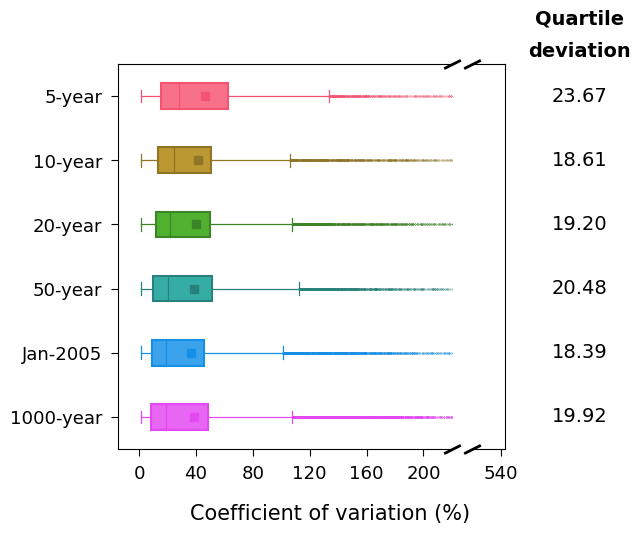

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))

x_label = 'Coefficient of variation (%)'

data_selection = events_comparison['cv']

# Fontsize
fontsize = 15
labelpad = 16

# Divide the plot into two
ax_cv_001 = ax
divider = make_axes_locatable(ax)
ax_cv_002 = divider.new_horizontal(size='10%', pad=0.2)
fig.add_axes(ax_cv_002)

# Boxplot 1
sns.boxplot(
    data=data_selection,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=.1), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax_cv_001
)

# Boxplot 2
sns.boxplot(
    data=data_selection,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=.1), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax_cv_002
)

# Zoom-in/ limit the view to different portions of the data
ax_cv_001.set_xlim(left=-15, right=220)
ax_cv_001.margins(x=0)
ax_cv_002.set_xlim(480, 550)

# Hide the spines between ax_cv_001 and ax_cv_002
ax_cv_001.spines.right.set_visible(False)
ax_cv_002.spines.left.set_visible(False)

# Set up x axis
ax_cv_001.xaxis.set_ticks(np.arange(0, 201, 40))
ax_cv_002.xaxis.set_ticks(np.arange(500, 541, 40)[1:])

# Design size and style for ticks and labels
for item in (ax_cv_002.get_xticklabels() + ax_cv_002.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(13)
ax_cv_002.tick_params(direction='out', length=5, pad=6)

# Design size and style for ticks and labels
for item in (ax_cv_001.get_xticklabels() + ax_cv_001.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(13)
ax_cv_001.tick_params(direction='out', length=5, pad=6)

# Turn off y tick label
ax_cv_002.set_yticks([])

# Draw the cut
d = .5 # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(
    marker=[(-1, -d), (1, d)], markersize=12,
    linestyle='none', color='k', mec='k', mew=2, clip_on=False
)
ax_cv_001.plot([1, 1], [1, 0], transform=ax_cv_001.transAxes, **kwargs)
ax_cv_002.plot([0, 0], [0, 1], transform=ax_cv_002.transAxes, **kwargs)

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
fig.text(.55, -.02, x_label, fontsize=fontsize, ha='center', va='center')

# RES - CV data
events_col1 = 'Quartile'
events_col2 = 'deviation'
events_cv_results = comparison_calculation(data_selection, 'quartile dev')
events_cv_text_full = "".join("{:.2f}\n".format(events_cv_results[i]) for i in range(len(events_cv_results)))
events_cv_text_rm = events_cv_text_full.rstrip()
ax.text(310, -1.2, events_col1, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(310, -.7, events_col2, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(310, 2.5, events_cv_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=4)

# Save fig
plt.savefig(
    fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison_002\\S3_oneboxplot_cv_event.jpg",
    bbox_inches='tight', dpi=600
)

Text(40900, 2.5, '1495\n1150\n1519\n1919\n1680\n3317')

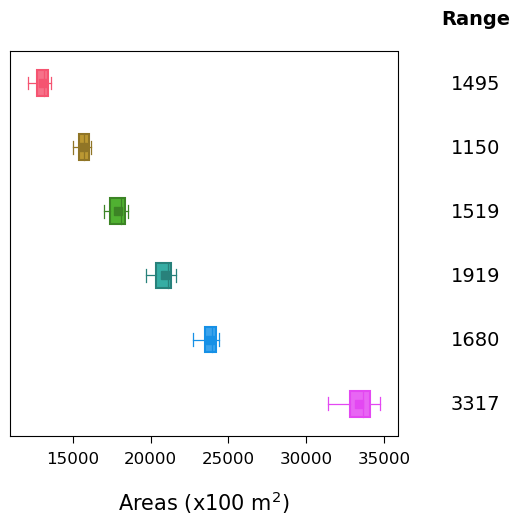

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))

x_label = 'Areas (x100 $\mathrm{m}^2$)'

data_selection = events_comparison['area']

# Fontsize
fontsize = 15
labelpad = 16

boxplot_sns = sns.boxplot(
    data=data_selection / 100,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=2), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax
)

# # Legend
# if col == 2 and row ==0:
#     ax[row][col].plot([], [], '|', linewidth=1, color='black', label='median')
#     ax[row][col].plot([], [], 's', linewidth=1, color='black', label='mean')
#     ax[row][col].legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
# else:
#     pass

# x axis for area
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.ticklabel_format(style='plain', axis='x')

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
boxplot_sns.set(yticklabels=[])
boxplot_sns.tick_params(left=False)

# Design size and style for ticks and labels
for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(12)
ax.tick_params(direction='out', length=5, pad=6)

# RES - AREA data
events_col = 'Range'
events_area_results = comparison_calculation(data_selection, 'range')
events_area_text_full = "".join("{:.0f}\n".format(events_area_results[0][i]/100) for i in range(len(events_area_results[0])))
events_area_text_rm = events_area_text_full.rstrip()
ax.text(40900, -1, events_col, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(40900, 2.5, events_area_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=4)

# # Save fig
# plt.savefig(
#     fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison_002\\S3_oneboxplot_area_event.jpg",
#     bbox_inches='tight', dpi=600
# )

In [16]:
print('median 5y: ', data_selection['5-year'].median(axis=0))
print('median 10y: ', data_selection['10-year'].median(axis=0))
print('median 20y: ', data_selection['20-year'].median(axis=0))
print('median 50y: ', data_selection['50-year'].median(axis=0))
print('median Jan-2005: ', data_selection['Jan-2005'].median(axis=0))
print('median 1000-year: ', data_selection['1000-year'].median(axis=0))

median 5y:  1315300.0
median 10y:  1569600.0
median 20y:  1809850.0
median 50y:  2108100.0
median Jan-2005:  2393100.0
median 1000-year:  3365600.0


In [17]:
data_selection_copy = data_selection.copy(deep=True)
data_selection_copy['5-year'] = data_selection['5-year'] - data_selection['5-year'].median(axis=0)
data_selection_copy['10-year'] = data_selection['10-year'] - data_selection['10-year'].median(axis=0)
data_selection_copy['20-year'] = data_selection['20-year'] - data_selection['20-year'].median(axis=0)
data_selection_copy['50-year'] = data_selection['50-year'] - data_selection['50-year'].median(axis=0)
data_selection_copy['Jan-2005'] = data_selection['Jan-2005'] - data_selection['Jan-2005'].median(axis=0)
data_selection_copy['1000-year'] = data_selection['1000-year'] - data_selection['1000-year'].median(axis=0)

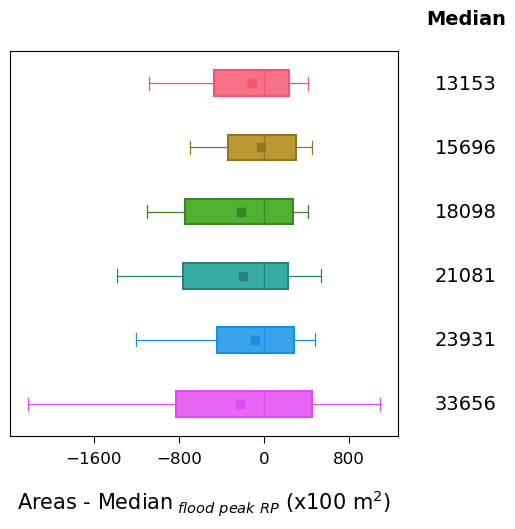

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))

# https://stackoverflow.com/questions/34701833/space-between-words-in-matplotlib-plot-axis-label
x_label = 'Areas - Median$_{\ flood\ peak\ RP}$ (x100 $\mathrm{m}^2$)'

# Fontsize
fontsize = 15
labelpad = 16

boxplot_sns = sns.boxplot(
    data=data_selection_copy / 100,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=2), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax
)

# # Legend
# if col == 2 and row ==0:
#     ax[row][col].plot([], [], '|', linewidth=1, color='black', label='median')
#     ax[row][col].plot([], [], 's', linewidth=1, color='black', label='mean')
#     ax[row][col].legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
# else:
#     pass

# x axis for area
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.ticklabel_format(style='plain', axis='x')

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
boxplot_sns.set(yticklabels=[])
boxplot_sns.tick_params(left=False)

# Design size and style for ticks and labels
for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(12)
ax.tick_params(direction='out', length=5, pad=6)

# RES - AREA data
events_col = 'Median'
events_area_results = comparison_calculation(data_selection, 'median')
events_area_text_full = "".join("{:.0f}\n".format(events_area_results[0][i]/100) for i in range(len(events_area_results[0])))
events_area_text_rm = events_area_text_full.rstrip()
ax.text(1900, -1, events_col, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(1900, 2.5, events_area_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=4)

# Save fig
plt.savefig(
    fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison_002\\S3_oneboxplot_area_event.jpg",
    bbox_inches='tight', dpi=600
)

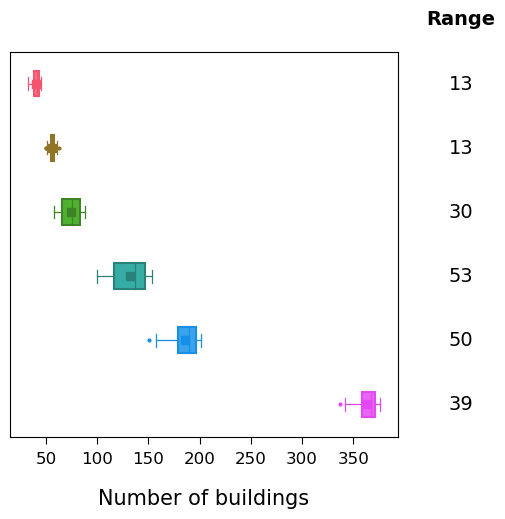

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))

x_label = 'Number of buildings'

data_selection = events_comparison['building']

# Fontsize
fontsize = 15
labelpad = 16

boxplot_sns = sns.boxplot(
    data=data_selection,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=2), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax
)

# # Legend
# if col == 2 and row ==0:
#     ax.plot([], [], '|', linewidth=1, color='black', label='median')
#     ax.plot([], [], 's', linewidth=1, color='black', label='mean')
#     ax.legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
# else:
#     pass

# # x axis for area
# ax.xaxis.set_major_locator(plt.MaxNLocator(5))
# ax.ticklabel_format(style='plain', axis='x')

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
boxplot_sns.set(yticklabels=[])
boxplot_sns.tick_params(left=False)

# Design size and style for ticks and labels
for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(12)
ax.tick_params(direction='out', length=5, pad=6)

# RES - BUILDING data
events_col = 'Range'
events_building_results = comparison_calculation(data_selection, 'range')
events_building_text_full = "".join("{:.0f}\n".format(events_building_results[0][i]) for i in range(len(events_building_results[0])))
events_building_text_rm = events_building_text_full.rstrip()
ax.text(455, -1, events_col, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(455, 2.5, events_building_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=4)

# Save fig
plt.savefig(
    fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison_002\\S3_oneboxplot_building_event.jpg",
    bbox_inches='tight', dpi=600
)

In [25]:
print('median 5y: ', data_selection['5-year'].median(axis=0))
print('median 10y: ', data_selection['10-year'].median(axis=0))
print('median 20y: ', data_selection['20-year'].median(axis=0))
print('median 50y: ', data_selection['50-year'].median(axis=0))
print('median Jan-2005: ', data_selection['Jan-2005'].median(axis=0))
print('median 1000-year: ', data_selection['1000-year'].median(axis=0))

median 5y:  41.0
median 10y:  56.0
median 20y:  75.5
median 50y:  137.0
median Jan-2005:  190.0
median 1000-year:  367.5


In [26]:
data_selection_copy = data_selection.copy(deep=True)
data_selection_copy['5-year'] = data_selection['5-year'] - data_selection['5-year'].median(axis=0)
data_selection_copy['10-year'] = data_selection['10-year'] - data_selection['10-year'].median(axis=0)
data_selection_copy['20-year'] = data_selection['20-year'] - data_selection['20-year'].median(axis=0)
data_selection_copy['50-year'] = data_selection['50-year'] - data_selection['50-year'].median(axis=0)
data_selection_copy['Jan-2005'] = data_selection['Jan-2005'] - data_selection['Jan-2005'].median(axis=0)
data_selection_copy['1000-year'] = data_selection['1000-year'] - data_selection['1000-year'].median(axis=0)

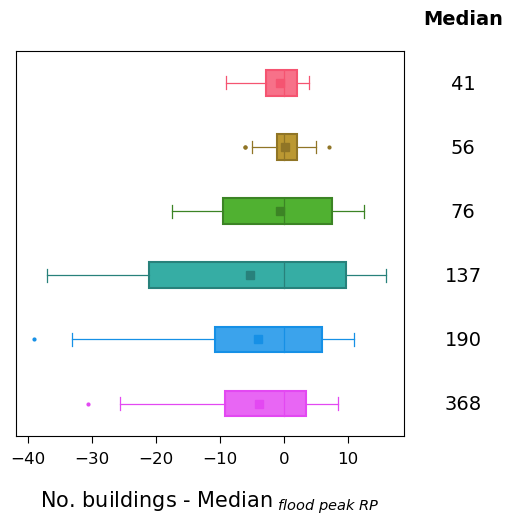

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))

x_label = 'No. buildings - Median$_{\ flood\ peak\ RP}$'

# data_selection = events_comparison['building']

# Fontsize
fontsize = 15
labelpad = 16

boxplot_sns = sns.boxplot(
    data=data_selection_copy,
    orient='h', # Boxplots lie horizontally
    showmeans=True, # Turn on mean sign
    meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
    flierprops=dict(marker='o', markersize=2), # Visualise outliers
    width=0.4, # Size/width of boxplots
    palette='husl', saturation=1, ax=ax
)

# # Legend
# if col == 2 and row ==0:
#     ax.plot([], [], '|', linewidth=1, color='black', label='median')
#     ax.plot([], [], 's', linewidth=1, color='black', label='mean')
#     ax.legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
# else:
#     pass

# # x axis for area
# ax.xaxis.set_major_locator(plt.MaxNLocator(5))
# ax.ticklabel_format(style='plain', axis='x')

# Colorise all lines of boxplots
box_patches = [
    patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch
]
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    colu = lighten_color(patch.get_facecolor(), 1.2)
    patch.set_edgecolor(colu)

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(colu)
        line.set_mfc(colu)  # facecolor of fliers
        line.set_mec(colu)  # edgecolor of fliers
        line.set_linewidth(.9)

# Adjust x and y labels
ax.set(ylabel=None)
ax.set_xlabel(x_label, fontsize=fontsize, labelpad=labelpad)
boxplot_sns.set(yticklabels=[])
boxplot_sns.tick_params(left=False)

# Design size and style for ticks and labels
for item in (ax.get_xticklabels() + ax.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(12)
ax.tick_params(direction='out', length=5, pad=6)

# RES - BUILDING data
events_col = 'Median'
events_building_results = comparison_calculation(data_selection, 'median')
events_building_text_full = "".join("{:.0f}\n".format(events_building_results[0][i]) for i in range(len(events_building_results[0])))
events_building_text_rm = events_building_text_full.rstrip()
ax.text(28, -1, events_col, fontsize=14, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax.text(28, 2.5, events_building_text_rm, fontsize=14, horizontalalignment='center',
                  verticalalignment='center', linespacing=4)

# Save fig
plt.savefig(
    fr"P:\\Martin_publication\\Grid_Orientation\\All_results\\Boxplots_comparison_002\\S3_oneboxplot_building_event.jpg",
    bbox_inches='tight', dpi=600
)